## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.utils import resample

import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.metrics import matthews_corrcoef


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

## Load Heart disease Dataset from Kaggle

In [2]:
df1 = pd.read_csv(r'C:\Users\soitb\OneDrive\Desktop\Datasets\Heart_disease\heart_2020_cleaned.csv')

In [3]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


## Preprocessing of Dataset

In [4]:
new_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}
df1['AgeCategory'] = df1['AgeCategory'].apply(lambda x: new_AgeCategory[x])
df1['AgeCategory'] = df1['AgeCategory'].astype('float')

### Normalization of data

In [5]:
for i in ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'SleepTime']:
    df1[i] = df1[i]/df1[i].max()

### 1. Converting Categorical columns with two values

In [6]:
for i in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    le = preprocessing.LabelEncoder()
    df1[i] = le.fit_transform(df1[i])

### 2. Converting Columns with more than 2 categorical values

In [7]:
df1 = pd.get_dummies(df1, columns=['Race', 'Diabetic', 'GenHealth', ], prefix = ['Race', 'Diabetic', 'GenHealth'])

In [8]:
df1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0.175013,1,0,0,0.100000,1.0,0,0,0.7125,...,1,0,0,1,0,0,0,0,0,1
1,0,0.214444,0,0,1,0.000000,0.0,0,0,1.0000,...,1,1,0,0,0,0,0,0,0,1
2,0,0.280232,1,0,0,0.666667,1.0,0,1,0.8375,...,1,0,0,1,0,0,1,0,0,0
3,0,0.255245,0,0,0,0.000000,0.0,0,0,0.9625,...,1,1,0,0,0,0,0,1,0,0
4,0,0.249974,0,0,0,0.933333,0.0,1,0,0.5250,...,1,1,0,0,0,0,0,0,0,1


In [9]:
df_col = df1.loc[:,:]

## Train Test Split

In [10]:
train , test = train_test_split(df_col, test_size = 0.3, random_state = 1)

In [11]:
train['HeartDisease'].value_counts()

0    204626
1     19230
Name: HeartDisease, dtype: int64

## Imbalance Removal

### 1. Using Resample

In [ ]:
def resample_method(data,column,n_samples,random_state):
    train_no = data[data[data.columns[column]] == 0]
    train_yes = data[data[data.columns[column]] == 1]
    train_yes = resample(train_yes, 
                                 replace=True,    # sample with replacement
                                 n_samples= n_samples, # to match majority class 'No'
                                 random_state=random_state)
    data = pd.concat([train_no, train_yes], axis=0)
    global train 
    train = data
    return train['HeartDisease'].value_counts()

In [ ]:
n_sample = train['HeartDisease'].value_counts()[0]
resample_method(train,0,n_sample,1)

In [ ]:
train.shape

### 2. Using SMOTE

#### Slicing target(y) and features(x) Column seperate

In [12]:
#Train
x_train = train.iloc[:,1:]
y_train = train.iloc[:,[0]]

print(x_train.shape)
print(y_train.shape)
print(y_train['HeartDisease'].value_counts())

(223856, 29)
(223856, 1)
0    204626
1     19230
Name: HeartDisease, dtype: int64


In [13]:
#Test
x_test = test.iloc[:,1:]
y_test = test.iloc[:,[0]]

print(x_test.shape)
print(y_test.shape)

(95939, 29)
(95939, 1)


In [14]:
def smote(x_tr, y_tr):
    oversample = SMOTE()
    global x_train
    global y_train
    x_train, y_train = oversample.fit_resample(x_tr, y_tr)
    return y_train['HeartDisease'].value_counts()

In [15]:
smote(x_train,y_train)

1    204626
0    204626
Name: HeartDisease, dtype: int64

## Correlation

In [ ]:
plt.figure(figsize = (12,10))
cor = x_train.corr()
sns.heatmap(cor)
plt.show()

Columns with Binary values

In [ ]:
binary_cols = ['HeartDisease','Sex','Smoking','AlcoholDrinking','Stroke','Asthma', 'DiffWalking',
               'PhysicalActivity','KidneyDisease','SkinCancer','Diabetic_No', 'Diabetic_No, borderline diabetes', 
               'Diabetic_Yes','Diabetic_Yes (during pregnancy)','GenHealth_Excellent','GenHealth_Fair', 
               'GenHealth_Good', 'GenHealth_Poor','GenHealth_Very good'
              ]

concating the dataset

In [ ]:
train_concat = pd.concat([y_train, x_train], axis=1)

#### Mathews Correlation Coefficient

In [ ]:
cols = train_concat.columns
corr = []

for col in cols:
    if col in binary_cols:
        corr.append(matthews_corrcoef(train_concat['HeartDisease'], train_concat[col]))
    else:
        corr.append(train_concat['HeartDisease'].corr(train_concat[col]))


correlation = pd.DataFrame(list(zip(cols, corr)), columns=['Variables','Corr_with_HeartDisease'])

correlation.drop(index=correlation.index[:1], axis=0, inplace=True)


#correlation

In [ ]:
for i in range(len(correlation)):
    # Colour of bar chart is set to red if corr is < 0 and green otherwise
    correlation['colors'] = ['#F0073B' if float(x) <= 0 else '#CB3579' for x in correlation['Corr_with_HeartDisease']]

correlation = correlation.sort_values(ascending=True, by=['Corr_with_HeartDisease']) 

plt.figure(figsize=(14,10), dpi=80)

plt.hlines(y=correlation.Variables, xmin=0, xmax=correlation.Corr_with_HeartDisease, color=correlation.colors,  linewidth=5)

plt.grid()
plt.show()

### Using correlation the most correlated columns can be removed from the dataset

## Machine Learning Models

## 1. Decision Tree

In [ ]:
# classifier = DecisionTreeClassifier(criterion='gini', random_state=1)  

In [ ]:
# classifier.fit(x_train, y_train)

In [ ]:
# y_pred = classifier.predict(x_test)

In [16]:
def decision_tree(x_train,y_train):
    global classifier
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=1)  
    classifier.fit(x_train, y_train)
    global y_pred
    # predicted values
    y_pred= classifier.predict(x_test)
    return y_pred

In [17]:
decision_tree(x_train,y_train)

array([0, 0, 0, ..., 1, 1, 0])

## 2. Random Forest

In [ ]:
# classifier = RandomForestClassifier(n_estimators = 100, random_state=1)

In [ ]:
# classifier.fit(x_train, np.ravel(y_train))

In [ ]:
# y_pred = classifier.predict(x_test)

In [ ]:
# classifier.get_params()

In [20]:
def random_forest(x_train,y_train):
    global classifier
    classifier = RandomForestClassifier(n_estimators = 100, random_state=1)  
    classifier.fit(x_train, np.ravel(y_train))
    global y_pred
    # predicted values
    y_pred= classifier.predict(x_test)
    return y_pred

In [21]:
random_forest(x_train,y_train)

array([0, 0, 1, ..., 0, 1, 0])

## 3. XGBoost

In [24]:
def xgb(x_train,y_train):
    global classifier
    classifier = XGBClassifier(eval_metric = 'error')
    classifier.fit(x_train, y_train)
    global y_pred
    # predicted values
    y_pred= classifier.predict(x_test)
    return y_pred

In [25]:
xgb(x_train,y_train)

array([0, 0, 0, ..., 0, 1, 0])

## Confusion Matrix

In [26]:
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(7,5))

    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')

    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values');

    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

    plt.show()

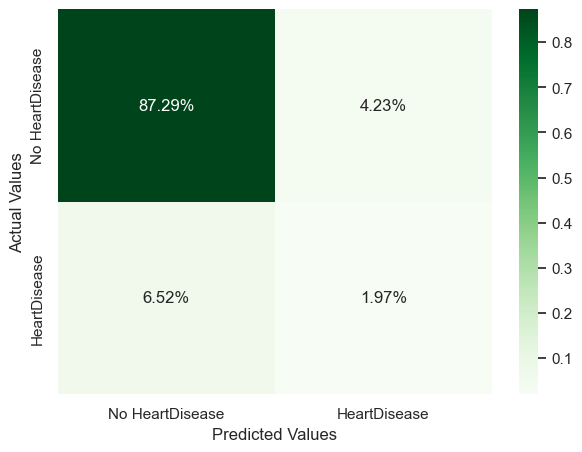

In [27]:
confusion(y_test, y_pred)

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

## Evaluation of Models

### Accuracy = (TP+TN)/(TP+FP+TN+FN)

In [ ]:
accuracy_score(y_test, y_pred)

### F1 Score = 2.(Precision . Recall)/(Precision + Recall)
#### Precision = TP/(TP+FP)
#### Recall = TP/(TP+FN)

In [ ]:
recall_score(y_test,y_pred)

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
f1_score(y_test, y_pred, average='micro')

### Balanced Accuracy = (Sensitivity+Specificity)/2
#### Sensitivity = TP/(TP+FN)
#### Specificity = TN/(TN+FP)

In [ ]:
balanced_accuracy_score(y_test, y_pred)

### AUC ROC Score

In [ ]:
auc_score1 = roc_auc_score(y_test, y_pred)
print(auc_score1, auc_score2)

## Grid Search

### Grid Search on Random Forest

In [ ]:
param_grid = {
    'n_estimators': [100],
    'max_depth': [7,8,9,10,20],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'max_features': ['log2']
}

grid = GridSearchCV(classifier, param_grid = param_grid, scoring = 'recall', cv = 5, verbose = 5, n_jobs = -1)

In [ ]:
grid.fit(x_train, np.ravel(y_train))

In [ ]:
best_estimator = grid.best_estimator_

In [ ]:
best_estimator.get_params()

In [ ]:
y_pred = best_estimator.predict(x_test)

### After applying grid search on Random forest and train through this,
### the comparitive result for Random Forest with and withput grid search --

#### 1. Confusion matrix true positive have gone up 4.15% (w/o grid search 2.56%)

#### 2. observed increase in AUC score 69% (without grid = 61.5%)

#### 3. Balanced_accuracy_score has gone up 69% (w/o grid search 61.5%)

#### 4. Decrese in Accuracy score 85.7% (w/o grid search 87.5%)

### Grid Search on xgboost

In [ ]:
xgb_model.get_params()

In [ ]:
default_params = {
    'booster': ['gbtree',]
    'learning_rate': [0.300000012,]
}

In [ ]:
gri =  GridSearchCV(xgb_model, {'max_depth': [2, 4, 6],'n_estimators': [50, 100, 200]}, verbose=1,n_jobs=2)
#grid = GridSearchCV(estimator=xgb_model, scoring='accuracy', param_grid=default_params, return_train_score=True, verbose=1, cv=3)

In [ ]:
grid.fit(x_train, y_train_ravel)

In [ ]:
best_estimator = grid.best_estimator_

In [ ]:
y_pred = best_estimator.predict(x_test)

## Cross Validation

In [ ]:
score_bal = cross_val_score(classifier, x_train, np.ravel(y_train), cv=5)
score_bal.mean()

In [ ]:
# score_imbal = cross_val_score(rf, df1.iloc[:,1:], np.ravel(df1.iloc[:,[0]], order = 'C'), cv=5)
# score_imbal.mean()

## Decision Tree Grid Search

In [ ]:

for i in [5,10]:
    
    print('max_depth',i)
    param_grid = {
        #'n_estimators': [100,200],
        'max_depth': [i],
        'min_samples_leaf': [2],
        'min_samples_split': [2],
        'max_features': ['sqrt']
    }

    grid = GridSearchCV(classifier, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
    
    grid.fit(x_train, np.ravel(y_train))
    
    best_estimator = grid.best_estimator_
    
    best_estimator.get_params()
    
    y_pred = best_estimator.predict(x_test)
    
    print('parameters',best_estimator.get_params())
    print('accuracy',accuracy_score(y_test, y_pred))
    print('balanced',balanced_accuracy_score(y_test, y_pred))
    
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

## Random Forest Grid Search

In [ ]:
for i in [2]:
    
    print('min_sample_leaf',i)
    param_grid = {
        'n_estimators': [60],
        'max_depth': [7],
        'min_samples_leaf': [i],
        'min_samples_split': [2],
        'max_features': ['auto']
    }

    grid = GridSearchCV(classifier, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
    
    grid.fit(x_train, np.ravel(y_train))
    
    best_estimator = grid.best_estimator_
    
    best_estimator.get_params()
    
    y_pred = best_estimator.predict(x_test)
    
    print('parameters',best_estimator.get_params())
    print('accuracy',accuracy_score(y_test, y_pred))
    print('balanced',balanced_accuracy_score(y_test, y_pred))
    
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(7,5))
    ax = sns.heatmap(cm/np.sum(cm),fmt='.2%', annot=True, cmap='Greens')
    ax.set_xlabel('Predicted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
    plt.show()

## Learning Curves

In [ ]:
def learning_curves(estimator, data, features, target, train_sizes, cv):
    train_sizes, train_scores, validation_scores = learning_curve(
    estimator, data[features], data[target], train_sizes = train_sizes,
    cv = cv, scoring = 'neg_mean_squared_error')
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)

    plt.plot(train_sizes, train_scores_mean, label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title, fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,40)


## Next ...............